<a href="https://colab.research.google.com/github/UNSW-ZZSC9020-2023H2/project/blob/main/src/GoogleColab.ipynb" target="_parent">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Exploratory Analysis Notebook 
The goal of this workbook is to explore the data and the relationships within for use in downstream modelling.

## Ideas
- Check literature first for what's already been done and ideas before embarking on time-consuming stuff.
- Then think about business use cases for the relationship between temperature and demand.
- Can we incorporate other data?

## Setup

In [3]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
temp = pd.read_csv('../data/raw/temperature_nsw.csv')
demand = pd.read_csv('../data/raw/totaldemand_nsw.csv')

## Temperature Analysis

In [5]:
temp.head(100)

,DATETIME,LOCATION,TEMPERATURE
0,2010-01-01 00:00:00,94766.0,23.1
1,2010-01-01 00:01:00,94766.0,23.1
2,2010-01-01 00:30:00,94766.0,22.9
3,2010-01-01 00:50:00,94766.0,22.7
4,2010-01-01 01:00:00,94766.0,22.6
...,...,...,...
95,2010-01-02 21:00:00,94766.0,22.7
96,2010-01-02 21:30:00,94766.0,22.9
97,2010-01-02 22:00:00,94766.0,22.9
98,2010-01-02 22:30:00,94766.0,22.7


In [6]:
# Check NAs
temp['TEMPERATURE'].isnull().sum()

0

In [7]:
# Remove outlier at -9999
temp.drop(temp[temp['TEMPERATURE'] <= -9999].index, inplace = True)

In [8]:
temp.describe()

,LOCATION,TEMPERATURE
count,247627.0,247627.000000
mean,94766.0,17.286950
std,0.0,5.820358
min,94766.0,-1.300000
25%,94766.0,13.300000
50%,94766.0,17.600000
75%,94766.0,21.200000
max,94766.0,44.700000


{'whiskers': [<matplotlib.lines.Line2D at 0x293c85c40>,
 'caps': [<matplotlib.lines.Line2D at 0x293ce1220>,
 'boxes': [<matplotlib.lines.Line2D at 0x293c85970>],
 'medians': [<matplotlib.lines.Line2D at 0x293ce17c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x293ce1a90>],
 'means': []}

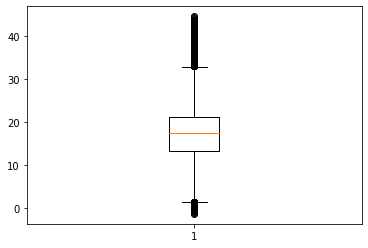

In [9]:
plt.boxplot(x=temp["TEMPERATURE"])

(array([  816., 14115., 37440., 62882., 76829., 42116., 10692.,  2161.,
          488.,    88.]),
 array([-1.3,  3.3,  7.9, 12.5, 17.1, 21.7, 26.3, 30.9, 35.5, 40.1, 44.7]),
 <BarContainer object of 10 artists>)

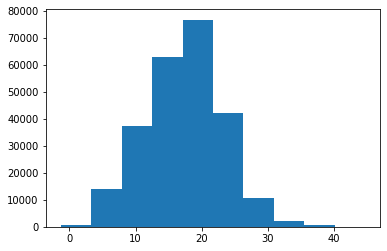

In [14]:
plt.hist(x=temp["TEMPERATURE"])

## Demand Analysis

In [10]:
demand.head(100)

,DATETIME,REGIONID,TOTALDEMAND
0,2010-01-01 00:00:00,NSW1,7997.41
1,2010-01-01 00:05:00,NSW1,7946.51
2,2010-01-01 00:10:00,NSW1,7921.55
3,2010-01-01 00:15:00,NSW1,7837.84
4,2010-01-01 00:20:00,NSW1,7781.11
...,...,...,...
95,2010-01-01 07:55:00,NSW1,7266.73
96,2010-01-01 08:00:00,NSW1,7330.97
97,2010-01-01 08:05:00,NSW1,7415.60
98,2010-01-01 08:10:00,NSW1,7479.60


In [11]:
demand.describe()

,TOTALDEMAND
count,1.323398e+06
mean,8.067966e+03
std,1.308206e+03
min,4.286190e+03
25%,7.097480e+03
50%,7.996510e+03
75%,8.914310e+03
max,1.464883e+04


In [12]:
demand['TOTALDEMAND'].isnull().sum()

0

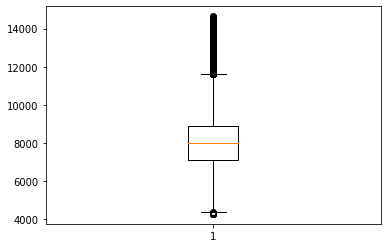

In [13]:
plt.boxplot(x=demand["TOTALDEMAND"])

(array([  1347., 123955., 308025., 403785., 293816., 137421.,  43637.,
          8811.,   2180.,    421.]),
 array([ 4286.19 ,  5322.454,  6358.718,  7394.982,  8431.246,  9467.51 ,
        10503.774, 11540.038, 12576.302, 13612.566, 14648.83 ]),
 <BarContainer object of 10 artists>)

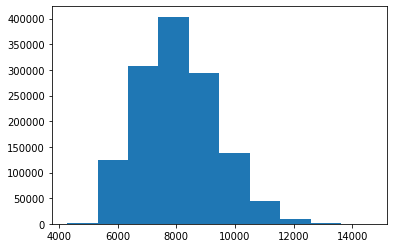

In [16]:
plt.hist(x=demand["TOTALDEMAND"])